# Chapter 1

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()
plt.style.use('ggplot')

In [63]:
# data prep
file = 'house-votes-84.csv'
url = 'https://assets.datacamp.com/production/course_1939/datasets/' + file
from urllib.request import urlretrieve
urlretrieve(url, file)
df = pd.read_csv(file, header=None)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [65]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [66]:
# we need to deal with the ?. I'll impute them to the most likely value per party.
dtv = pd.DataFrame([])
rtv = pd.DataFrame([])
for col in df.columns:
    if col == 'party':
        pass
    else:
        table = df.groupby(['party', col])[col].count()
        dtv.loc[col,'vote'] = table['democrat'].argmax()
        rtv.loc[col,'vote'] = table['republican'].argmax()
print(dtv)
print(rtv)

                  vote
infants              y
water                y
budget               y
physician            n
salvador             n
religious            n
satellite            y
aid                  y
missile              y
immigration          n
synfuels             y
education            n
superfund            n
crime                n
duty_free_exports    y
eaa_rsa              y
                  vote
infants              n
water                y
budget               n
physician            y
salvador             y
religious            y
satellite            n
aid                  n
missile              n
immigration          y
synfuels             n
education            y
superfund            y
crime                y
duty_free_exports    n
eaa_rsa              y


/Users/Brian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if __name__ == '__main__':
/Users/Brian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  # Remove the CWD from sys.path while we load stuff.


In [73]:
# Not let's fillna
for col in df.columns:
    if col == 'party':
        pass
    else:
        df.loc[(df['party'] == 'democrat') & (df[col] == '?'), col] = dtv.loc[col,'vote']
        df.loc[(df['party'] == 'republican') & (df[col] == '?'), col] = rtv.loc[col,'vote']

In [74]:
df

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,n,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y


In [75]:
# Now convert to integer
conv = {'y':1, 'n':0}

# cat columns
cols = df.columns.tolist()
cols.remove('party')

# replace and convert
for col in df.columns:
    df[col].replace(conv, inplace=True)
    #df[col] = df[col].apply(lambda x: x.astype('int'))

In [76]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [77]:
df.dtypes

party                object
infants               int64
water                 int64
budget                int64
physician             int64
salvador              int64
religious             int64
satellite             int64
aid                   int64
missile               int64
immigration           int64
synfuels              int64
education             int64
superfund             int64
crime                 int64
duty_free_exports     int64
eaa_rsa               int64
dtype: object

In [78]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [83]:
# data prep
row = [0.24187957146775374,
  0.7726814675812379,
  0.9390905610712432,
  0.1936686792565565,
  0.012572668327916814,
  0.11406681101018734,
  0.4533617224047448,
  0.8385622317590328,
  0.11850712598377666,
  0.29494571264790226,
  0.32535278441797433,
  0.27044235972869113,
  0.005232106100128364,
  0.31497038556939794,
  0.8685389337234811,
  0.06616314286215619]

X_new_t = pd.DataFrame({0: row})
X_new = X_new_t.transpose()

In [84]:
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.24188,0.772681,0.939091,0.193669,0.012573,0.114067,0.453362,0.838562,0.118507,0.294946,0.325353,0.270442,0.005232,0.31497,0.868539,0.066163


In [86]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


In [ ]:
# data prep

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

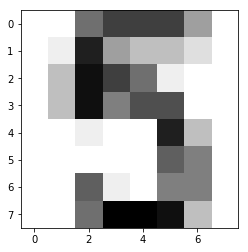

In [90]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [93]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42,
                                                    stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


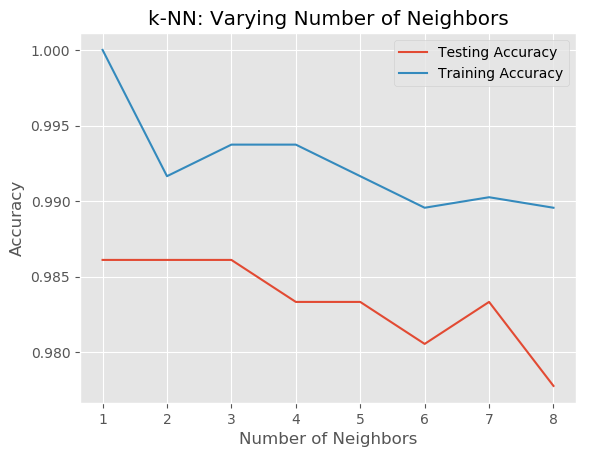

In [96]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()